In [1]:
#Install omdb library
!pip install omdb

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#Dependencies
import pandas as pd
import requests
import json
import omdb
import time
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint
from config import omdb_key

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#Read in csv and create initial dataframe
actors = pd.read_csv("Craig_portion/Resources/tmdb_5000_credits.csv")
actors.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#Create input for preferred actor
actor_name = input ("What actor would you like to know about?")

What actor would you like to know about?Harrison Ford


In [5]:
#Locate and count all movies selected actor was in
selected_actor = actors[actors["cast"].str.contains(actor_name)]
selected_actor = selected_actor.reset_index(drop=True)
moviecount = len(selected_actor.index)

#Display
print (str(actor_name) + " has been in " + str(moviecount) + " movies")

Harrison Ford has been in 32 movies


In [6]:
#Create dataframe for all movies acted in
print (str(actor_name) + " has been in the following movies")
movies_played_in = pd.DataFrame(selected_actor["title"])
movies_played_in

Harrison Ford has been in the following movies


,title
0,Indiana Jones and the Kingdom of the Crystal S...
1,Ender's Game
2,The Expendables 3
3,What Lies Beneath
4,The Devil's Own
5,K-19: The Widowmaker
6,Air Force One
7,Six Days Seven Nights
8,Hollywood Homicide
9,Random Hearts


In [30]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

Metascore = {"Metascore": [],
             "Year Released": [],
             "Rated": [],
             "Box Office": [],
             "Plot": []}

Genre = {"Genre": []}

for movie in selected_actor["title"]:
         
    url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie, omdb_key)
    
    #Print log of movie being processed
    print(f"Now retrieving Movie Data for: " + movie)
    print(url)
    
    #Run requests to API
    movie_data = requests.get(url).json()

    Metascore["Metascore"].append(movie_data["Metascore"])
    Metascore["Year Released"].append(movie_data["Year"])
    Metascore["Rated"].append(movie_data["Rated"])
    Metascore["Box Office"].append(movie_data["BoxOffice"])
    Metascore["Plot"].append(movie_data["Plot"])
    
    Genre["Genre"].append(movie_data["Genre"])
       
    pprint(movie_data)    

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving Movie Data for: Indiana Jones and the Kingdom of the Crystal Skull
http://www.omdbapi.com/?t=Indiana Jones and the Kingdom of the Crystal Skull&apikey=47006815
{'Actors': 'Harrison Ford, Cate Blanchett, Karen Allen, Shia LaBeouf',
 'Awards': 'Nominated for 1 BAFTA Film Award. Another 10 wins & 35 '
           'nominations.',
 'BoxOffice': '$316,957,122',
 'Country': 'USA',
 'DVD': '14 Oct 2008',
 'Director': 'Steven Spielberg',
 'Genre': 'Action, Adventure, Fantasy',
 'Language': 'English, German, Russian',
 'Metascore': '65',
 'Plot': 'Famed archaeologist and adventurer Dr. Henry "Indiana" Jones, Jr. is '
         'called back into action, when he becomes entangled in a Soviet plot '
         'to uncover the secret behind mysterious artifacts known as the '
         'Crystal Skulls.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTIxNDUxNzcyMl5BMl5BanBnXkFtZTcwNTgwOTI3MQ@@._V1

{'Actors': 'Harrison Ford, Josh Hartnett, Lena Olin, Bruce Greenwood',
 'Awards': '1 win.',
 'BoxOffice': '$30,013,346',
 'Country': 'USA',
 'DVD': '07 Oct 2003',
 'Director': 'Ron Shelton',
 'Genre': 'Action, Comedy, Crime',
 'Language': 'English',
 'Metascore': '47',
 'Plot': 'Two LAPD detectives who moonlight in other fields investigate the '
         'murder of an up-and-coming rap group.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTU5Mjk1NzQ4Nl5BMl5BanBnXkFtZTYwMTYxNzk5._V1_SX300.jpg',
 'Production': 'Columbia Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.3/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '30%'},
             {'Source': 'Metacritic', 'Value': '47/100'}],
 'Released': '13 Jun 2003',
 'Response': 'True',
 'Runtime': '116 min',
 'Title': 'Hollywood Homicide',
 'Type': 'movie',
 'Website': 'http://www.sonypictures.com/movies/hollywoodhomicide/index.html',
 'Writer': 'Robert Souza, Ron Shel

{'Actors': 'Chadwick Boseman, Harrison Ford, Nicole Beharie, Christopher '
           'Meloni',
 'Awards': '3 wins & 18 nominations.',
 'BoxOffice': '$95,001,343',
 'Country': 'USA',
 'DVD': '16 Jul 2013',
 'Director': 'Brian Helgeland',
 'Genre': 'Biography, Drama, Sport',
 'Language': 'English',
 'Metascore': '62',
 'Plot': 'In 1947, Jackie Robinson becomes the first African-American to play '
         'in Major League Baseball in the modern era when he was signed by the '
         'Brooklyn Dodgers and faces considerable racism in the process.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTQwMDU4MDI3MV5BMl5BanBnXkFtZTcwMjU1NDgyOQ@@._V1_SX300.jpg',
 'Production': 'Warner Bros. Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.5/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '79%'},
             {'Source': 'Metacritic', 'Value': '62/100'}],
 'Released': '12 Apr 2013',
 'Response': 'True',
 'Runtime': '128 min'

{'Actors': 'Harrison Ford, Karen Allen, Paul Freeman, Ronald Lacey',
 'Awards': 'Won 4 Oscars. Another 30 wins & 23 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '21 Oct 2003',
 'Director': 'Steven Spielberg',
 'Genre': 'Action, Adventure',
 'Language': 'English, German, Hebrew, Spanish, Arabic, Nepali',
 'Metascore': '85',
 'Plot': 'Archaeologist and adventurer Indiana Jones is hired by the U.S. '
         'government to find the Ark of the Covenant before the Nazis.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMjA0ODEzMTc1Nl5BMl5BanBnXkFtZTcwODM2MjAxNA@@._V1_SX300.jpg',
 'Production': 'Paramount Pictures',
 'Rated': 'PG',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.5/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '94%'},
             {'Source': 'Metacritic', 'Value': '85/100'}],
 'Released': '12 Jun 1981',
 'Response': 'True',
 'Runtime': '115 min',
 'Title': 'Raiders of the Lost Ark',
 'Type': 'movie',
 'Website': 'http://www.in

In [31]:
metascore_final = pd.DataFrame(Metascore)
df_merge = pd.merge(metascore_final, movies_played_in, left_index=True, right_index=True)
df_merge2 = df_merge[["title", "Year Released", "Rated", "Metascore", "Box Office", "Plot"]]
final = df_merge2.rename(index=str, columns={"title": "Title"})
final.head()

,Title,Year Released,Rated,Metascore,Box Office,Plot
0,Indiana Jones and the Kingdom of the Crystal S...,2008,PG-13,65,"$316,957,122","Famed archaeologist and adventurer Dr. Henry ""..."
1,Ender's Game,2013,PG-13,51,"$61,656,849",Young Ender Wiggin is recruited by the Interna...
2,The Expendables 3,2014,PG-13,35,"$34,742,878",Barney augments his team with new blood for a ...
3,What Lies Beneath,2000,PG-13,51,"$155,018,556",The wife of a university research scientist be...
4,The Devil's Own,1997,R,53,N/A,A police officer uncovers the real identity of...


In [32]:
#Create genre dataframe
movie_genre = pd.DataFrame(Genre)
#Merge to movies_played_in dataframe
title_genre_merge = pd.merge(movie_genre, movies_played_in, left_index=True, right_index=True)
#Display
title_genre_merge.head()

,Genre,title
0,"Action, Adventure, Fantasy",Indiana Jones and the Kingdom of the Crystal S...
1,"Action, Fantasy, Sci-Fi",Ender's Game
2,"Action, Adventure, Thriller",The Expendables 3
3,"Drama, Fantasy, Horror",What Lies Beneath
4,"Action, Crime, Drama",The Devil's Own


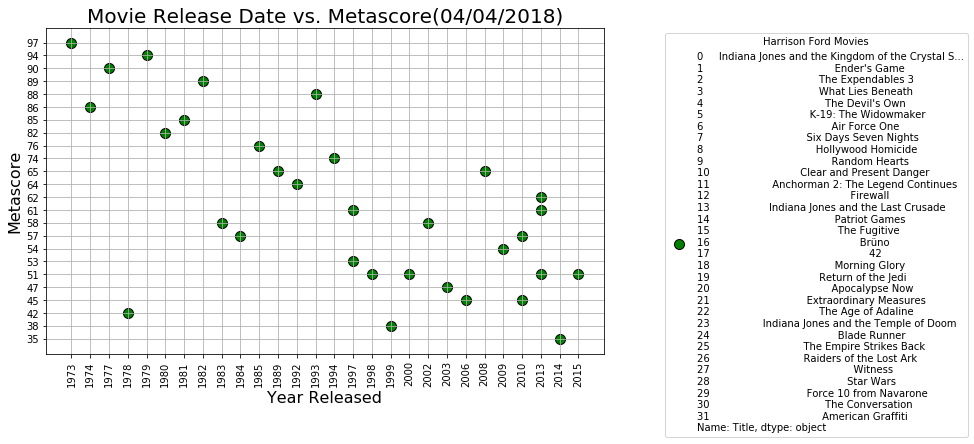

In [9]:
#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatterplot for each "Screen Name" comparing "Tweets Ago" & "Compound Score"
plt.scatter(final["Year Released"], final["Metascore"], color= "green", edgecolor= "black",
            label= final["Title"], s= 100)

#Aesthetics
plt.title("Movie Release Date vs. Metascore" + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Year Released", fontsize=16)
plt.xticks(rotation= 90)
plt.ylabel("Metascore", fontsize=16)
plt.legend(bbox_to_anchor= (1.1, 1), title= actor_name + " Movies", fontsize= "medium")

#Save plot as PNG image
plt.savefig("Images/Movie_Release_Date_vs._Metascore.png", bbox_inches= "tight")

#Display Output
plt.grid()
plt.show()

### Sentiment Analysis movies actor played in

In [13]:
#Create list for compound sentiment analysis scores
compound_score = []

#Loop through plot summary for each movie
for row in final["Plot"]:
    # Run sentiment analysis
    compound = analyzer.polarity_scores(row)["compound"]
    compound_score.append(compound)
    pos = analyzer.polarity_scores(row)["pos"]
    neu = analyzer.polarity_scores(row)["neu"]
    neg = analyzer.polarity_scores(row)["neg"]
# Print Analysis
    print(row)
    print("Compound Score: %s" % compound)
    print("Positive Score: %s" % pos)
    print("Neutral Score: %s" % neu)
    print("Negative Score: %s" % neg)
    print("\n")

Famed archaeologist and adventurer Dr. Henry "Indiana" Jones, Jr. is called back into action, when he becomes entangled in a Soviet plot to uncover the secret behind mysterious artifacts known as the Crystal Skulls.
Compound Score: 0.296
Positive Score: 0.064
Neutral Score: 0.936
Negative Score: 0.0


Young Ender Wiggin is recruited by the International Military to lead the fight against the Formics, a genocidal alien race which nearly annihilated the human race in a previous invasion.
Compound Score: -0.3818
Positive Score: 0.0
Neutral Score: 0.912
Negative Score: 0.088


Barney augments his team with new blood for a personal battle: to take down Conrad Stonebanks, the Expendables co-founder and notorious arms trader who is hell bent on wiping out Barney and every single one of his associates.
Compound Score: -0.8779
Positive Score: 0.0
Neutral Score: 0.771
Negative Score: 0.229


The wife of a university research scientist believes that her lakeside Vermont home is haunted by a ghost

In [20]:
#Create dataframe for compound scores
compound_score_df = pd.DataFrame(compound_score, columns=["Compound Score"])
compound_score_df.head()

#Create dataframe for movie titles
titles = []
for title in final["Title"]:
    titles.append(title)
titles_df = pd.DataFrame(titles, columns=["Title"])
titles_df.head()

#Merge above dataframes
title_compound = pd.merge(titles_df, compound_score_df, left_index=True, right_index=True)
first_merge = pd.DataFrame(title_compound)
first_merge.head()

,Title,Compound Score
0,Indiana Jones and the Kingdom of the Crystal S...,0.2960
1,Ender's Game,-0.3818
2,The Expendables 3,-0.8779
3,What Lies Beneath,-0.7906
4,The Devil's Own,-0.7845


# Ignore below

In [ ]:
#Export DataFrame as CSV
#movie_info.to_csv("basic_movie_info.csv")

In [ ]:
# Read and display the CSV with Pandas 
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)

#Create df for movie titles and display
movie_info = pd.DataFrame(movies_df[["title",
                                     "release_date",
                                     "revenue",
                                     "runtime",
                                     "overview",
                                     "tagline"]])

movie_info_final = movie_info.rename(index=str, columns={"title": "Movie Title",
                                      "release_date": "Released",
                                      "revenue": "Revenue",
                                      "runtime": "Length (min)",
                                      "overview": "Brief Description",
                                      "tagline": "Tagline"})
movie_info_final.head()

In [ ]:
movie_title = input("What movie are you looking for? ")

In [ ]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")
     
url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie_title, omdb_key)
    
#Print log of movie being processed
print(f"Now retrieving Movie Data for: " + movie_title)
print(url)
    
#Run requests to API
movie_data = requests.get(url).json()

pprint(movie_data)